# Geospatial data
## Vector
* Point
* Line
* Polygon 

In a geospatial context, these geometric objects have a Coordinate Reference System (CRS) associated to them. 
*  Ellipsoidal (e.g., EPSG:4326/WGS84)
    * Unit: degree
    * Axes: Longitude, Latitude
*  Projected (e.g., EPSG:3857/Pseudo-mercator)
    * Unit: metre
    * Axes: Easting, Northing





# GeoPandas

### Import/Install geopandas

In [ ]:
try:
        import geopandas as gpd
except ImportError:
        import subprocess
        print('geopandas package not installed. Installing ...')
        subprocess.check_call(["python", '-m', 'pip', 'install', 'geopandas'])


In [75]:
import geopandas as gpd

In [76]:
ex_amenities = gpd.read_file("https://github.com/hsbarbosa/intro-gda/blob/main/data/exeter_amenities.zip?raw=true")

In [117]:
ex_amenities.head()

,osm_id,timestamp,name,type,geometry
0,210547307,None,None,crossing,POINT (-3.53198 50.73576)
1,210547308,None,None,mini_roundabout,POINT (-3.53228 50.73551)
2,243259804,None,None,turning_circle,POINT (-3.52476 50.73654)
3,244313986,None,None,post_box,POINT (-3.52306 50.73375)
4,248528674,None,None,turning_circle,POINT (-3.52339 50.73461)


#### From a geopandas dataframe `geometry` column we have access to the geometric operations we saw earlier

In [ ]:
ex_amenities.geometry.area

In [ ]:
ex_amenities.geometry.buffer(0.001)

## Plotting

Let's read one of the GeoPandas example datasets

In [103]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [104]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


### Choropleth map

##### Countries coloured by population

<AxesSubplot:>

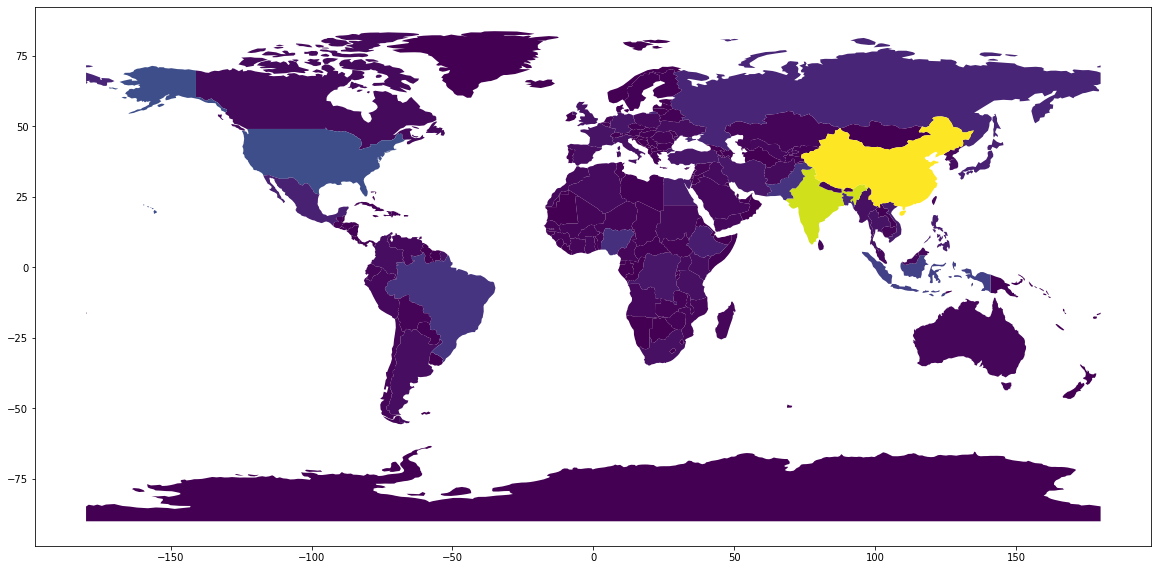

In [105]:
world.plot(column='pop_est',figsize=(20,20))

With a different colourmap

<AxesSubplot:>

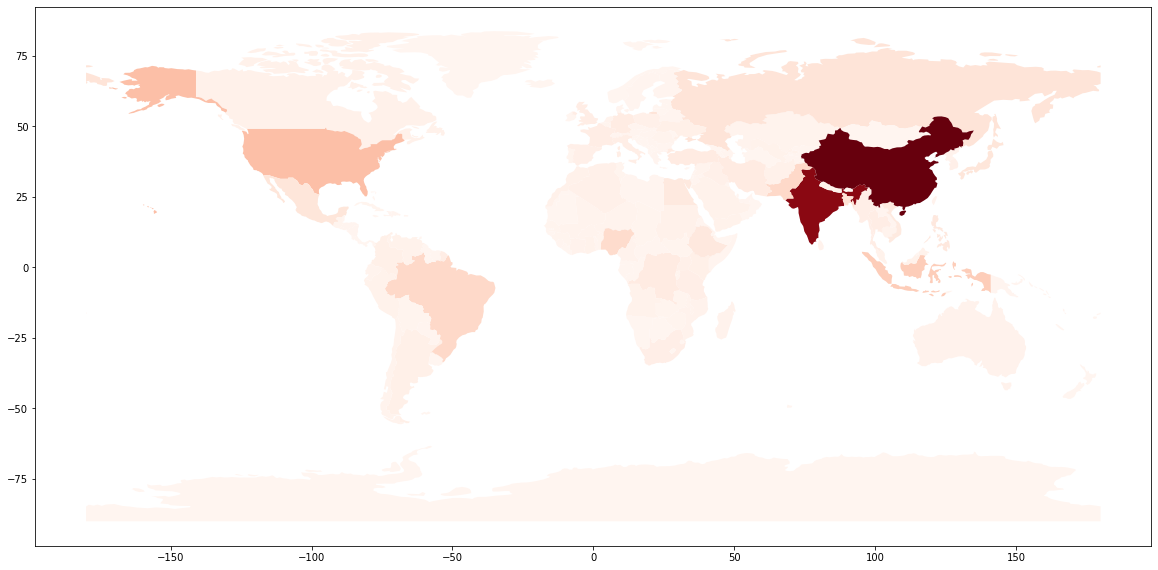

In [108]:
world.plot(column='pop_est',figsize=(20,20),cmap='Reds')

#### Countries coloured by GDP

<AxesSubplot:>

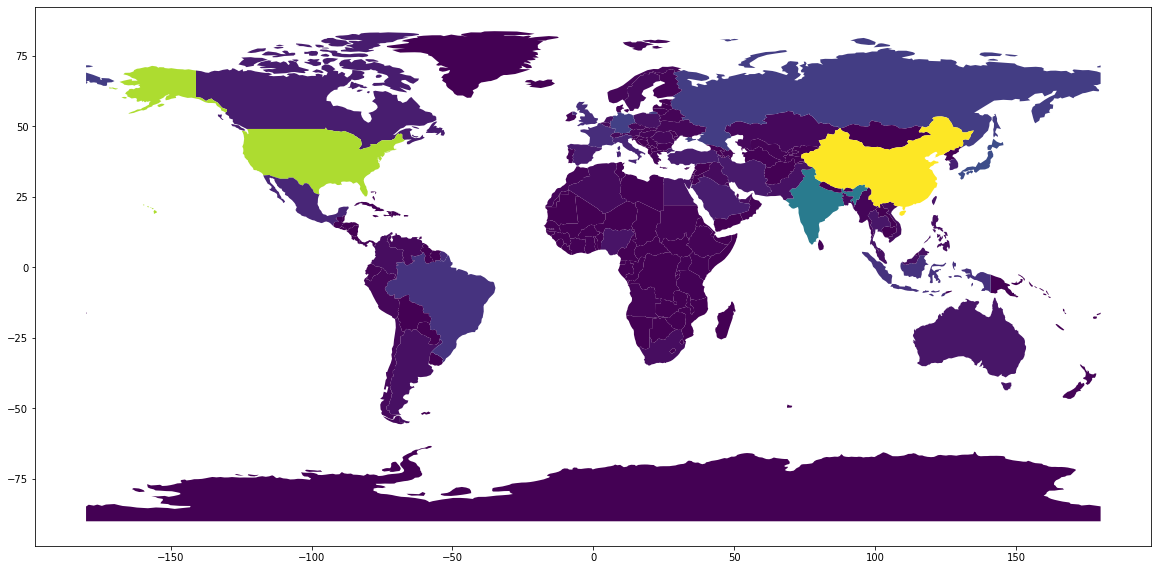

In [109]:
world.plot(column='gdp_md_est',figsize=(20,20))

# Practice time!
* Plot the countries coloured by:
    * GDP per capita (gdp/population)
    * Population density (population/area)

________________

# Coordinate Reference Systems (CRS)

There are standards that specify how coordinates are represented and transformed.
It's defined by a coordinate system and a datum.
* A **coordinate system**: a set of mathematical rules for specifying how coordinates are to be assigned to points, such as: affine, cylindrical, Cartesian, ellipsoidal, linear, polar, spherical, vertical, etc
* A **datum**:  a set of parameters that define the position of the origin, the scale, and the orientation of a coordinate system

In [11]:
lsoa = gpd.read_file("https://borders.ukdataservice.ac.uk/ukborders/easy_download/prebuilt/shape/England_lsoa_2011_clipped.zip")

In [124]:
lsoa.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: UK - Britain and UKCS 49°46'N to 61°01'N, 7°33'W to 3°33'E
- bounds: (-9.2, 49.75, 2.88, 61.14)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

### CRS transformation

In [126]:
lsoa_lat = lsoa.to_crs("epsg:4326")

,name,code,geometry
0,Mid Suffolk 006B,E01030056,"POLYGON ((0.96375 52.21553, 0.96381 52.21557, ..."
1,Mid Suffolk 007B,E01030057,"POLYGON ((1.22085 52.16928, 1.22049 52.16879, ..."
2,Mid Suffolk 002B,E01030054,"POLYGON ((1.03748 52.34269, 1.03749 52.34287, ..."
3,Mid Suffolk 002C,E01030055,"POLYGON ((1.04167 52.30241, 1.04161 52.30232, ..."
4,Mid Suffolk 001A,E01030052,"POLYGON ((1.12687 52.32997, 1.12674 52.33016, ..."
...,...,...,...
32839,Gateshead 023A,E01008189,"POLYGON ((-1.59771 54.91950, -1.59774 54.91951..."
32840,Sheffield 042A,E01008108,"POLYGON ((-1.46789 53.36687, -1.46785 53.36689..."
32841,Trafford 001F,E01006188,"POLYGON ((-2.27322 53.46135, -2.27321 53.46134..."
32842,Gateshead 022C,E01008188,"POLYGON ((-1.74731 54.93600, -1.74658 54.93614..."


In [129]:
lsoa_lat.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

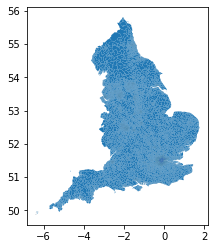

In [128]:
lsoa_lat.plot()

# Reading/Writing geospatial data files

### Creating a GeoDataFrame from text data

In [45]:
crimes = pd.read_csv("https://github.com/hsbarbosa/intro-gda/blob/main/data/2020-03-devon-and-cornwall-street.csv?raw=true")
crimes.dropna(subset=['Latitude'],inplace=True)

In [47]:
crimes.shape

(9469, 12)

In [131]:
crimes.head(2)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2020-03,Devon & Cornwall Police,Devon & Cornwall Police,-4.543901,50.827132,On or near Nightclub,E01018936,Cornwall 001A,Anti-social behaviour,NaN,NaN
1,NaN,2020-03,Devon & Cornwall Police,Devon & Cornwall Police,-4.546017,50.827914,On or near Ergue-Gaberic Way,E01018936,Cornwall 001A,Anti-social behaviour,NaN,NaN


#### It is still a regular `pandas` DataFrame. 

How can we turn it into a `GeoDataFrame`?
* It needs a `geometry` column

In the example below we create a `Point` column from the (Longitude,Latitude) information.

In [52]:
from shapely.geometry import Point

### Creating the geometry column

In [134]:
crimes['geometry'] = crimes[['Longitude', 'Latitude']].apply(Point,axis=1)

<AxesSubplot:>

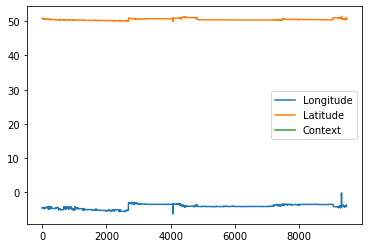

In [136]:
crimes.plot()

## What is wrong?


In [137]:
type(crimes)

pandas.core.frame.DataFrame

In [138]:
crimes = gpd.GeoDataFrame(crimes)

### Now it's correct 👍🏼

In [140]:
type(crimes)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

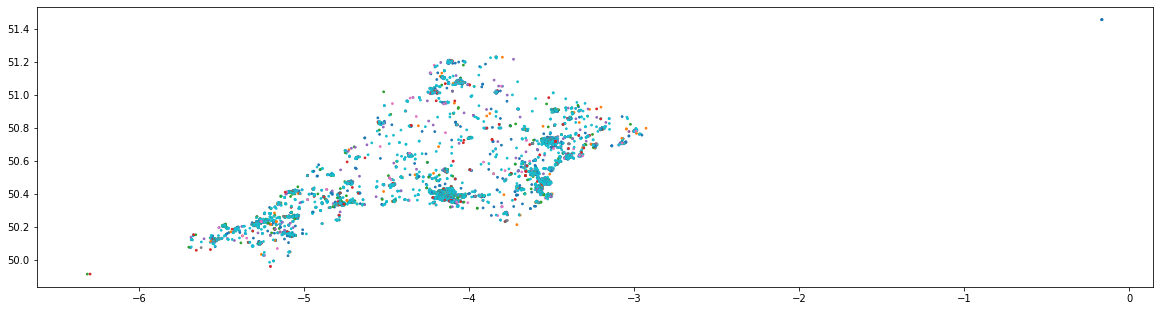

In [150]:
crimes.plot(markersize=3,column='Crime type',figsize=(20,20))

## Spatial joining

In [152]:
gpd.sjoin(crimes,lsoa)

/Users/hugobarbosa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:27700

  """Entry point for launching an IPython kernel.


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,geometry,index_right,name,code


## What is wrong? 

`crimes` has no CRS

In [154]:
crimes.crs

## How do we fix this?
* We have to set the CRS.
* Since it is in Lon,Lat, we can assume it is **EPSG:4326** (unless stated otherwise)

In [163]:
crimes.crs = "EPSG:4326"

In [164]:
crimes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Are we good for the spatial joining?

In [165]:
gpd.sjoin(crimes,lsoa)

/Users/hugobarbosa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:27700

  """Entry point for launching an IPython kernel.


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,geometry,index_right,name,code


## Still nothing 😭

#### Check the warning
* CRS mismatch.

Both GeoDataFrames have to have the same CRS 

In [168]:
lsoa_lat.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [170]:
crimes.crs == lsoa_lat.crs

True

In [172]:
crimes_joined = gpd.sjoin(crimes,lsoa_lat)

In [173]:
crimes_joined.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,geometry,index_right,name,code
0,NaN,2020-03,Devon & Cornwall Police,Devon & Cornwall Police,-4.543901,50.827132,On or near Nightclub,E01018936,Cornwall 001A,Anti-social behaviour,NaN,NaN,POINT (-4.54390 50.82713),25140,Cornwall 001A,E01018936
1,NaN,2020-03,Devon & Cornwall Police,Devon & Cornwall Police,-4.546017,50.827914,On or near Ergue-Gaberic Way,E01018936,Cornwall 001A,Anti-social behaviour,NaN,NaN,POINT (-4.54602 50.82791),25140,Cornwall 001A,E01018936
2,NaN,2020-03,Devon & Cornwall Police,Devon & Cornwall Police,-4.544574,50.830635,On or near Belle Vue Lane,E01018936,Cornwall 001A,Anti-social behaviour,NaN,NaN,POINT (-4.54457 50.83064),25140,Cornwall 001A,E01018936
3,e7271a3c34d84fe10161114d6361287d5cc2b7b271d2f6...,2020-03,Devon & Cornwall Police,Devon & Cornwall Police,-4.542007,50.830178,On or near Supermarket,E01018936,Cornwall 001A,Burglary,Under investigation,NaN,POINT (-4.54201 50.83018),25140,Cornwall 001A,E01018936
4,9d45097d553354c58a203e778fb9cf7c4b3dfba77a265d...,2020-03,Devon & Cornwall Police,Devon & Cornwall Police,-4.549746,50.828327,On or near Breakwater Road,E01018936,Cornwall 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN,POINT (-4.54975 50.82833),25140,Cornwall 001A,E01018936


## Notice that the order of the parameters matter

In [174]:
lsoa_joined = gpd.sjoin(lsoa_lat,crimes)

In [181]:
lsoa_joined.head(2)

,name,code,geometry,index_right,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
19,Mid Devon 001C,E01020050,"POLYGON ((-3.52699 51.00655, -3.52703 51.00666...",4077,d72887f296d24dde0c825d69fe11b070d8d07333e36329...,2020-03,Devon & Cornwall Police,Devon & Cornwall Police,-3.49079,51.01304,On or near Valley View,E01020050,Mid Devon 001C,Violence and sexual offences,Unable to prosecute suspect,NaN
19,Mid Devon 001C,E01020050,"POLYGON ((-3.52699 51.00655, -3.52703 51.00666...",4076,5dd32eb003fb0e39c209139a336aefcefcb9555ee12777...,2020-03,Devon & Cornwall Police,Devon & Cornwall Police,-3.49079,51.01304,On or near Valley View,E01020050,Mid Devon 001C,Violence and sexual offences,Under investigation,NaN


### Getting the most common crime type in each LSOA

In [179]:
gb = lsoa_joined.groupby(['code'])

In [191]:
common_crimes = gb.agg({"geometry":"first",
        "Crime type":lambda x: x.value_counts().idxmax()
       })

In [193]:
common_crimes.plot(column='Crime type')

TypeError: no numeric data to plot

## What is wrong? 
It is not a GeoDataFrame anymore! 

In [194]:
type(common_crimes)

pandas.core.frame.DataFrame

In [196]:
common_crimes = gpd.GeoDataFrame(common_crimes,crs=crimes.crs)

In [197]:
type(common_crimes)

geopandas.geodataframe.GeoDataFrame

In [198]:
common_crimes.head()

,geometry,Crime type
code,,
E01004557,"POLYGON ((-0.16564 51.45709, -0.16560 51.45695...",Anti-social behaviour
E01015023,"POLYGON ((-4.14378 50.41570, -4.14395 50.41572...",Violence and sexual offences
E01015024,"POLYGON ((-4.16735 50.42111, -4.16747 50.42116...",Criminal damage and arson
E01015025,"POLYGON ((-4.11698 50.42450, -4.11694 50.42450...",Violence and sexual offences
E01015026,"POLYGON ((-4.16038 50.41888, -4.16048 50.41889...",Violence and sexual offences


<AxesSubplot:>

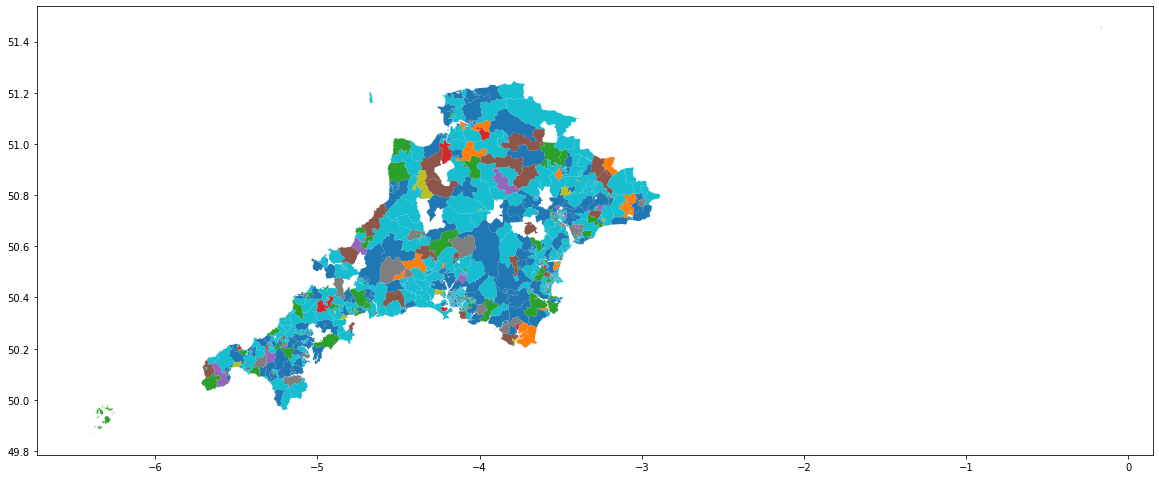

In [200]:
common_crimes.plot(column='Crime type',figsize=(20,20))